In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
plt.close("all")

def converter_presenca(df, coluna='Presença'):
    df[coluna] = (
        df[coluna]
        .astype(str)  
        .str.strip() 
        .str.replace(',', '.', regex=True)  
        .str.replace('%', '', regex=True)  
        .astype(float) 
    )
    return df

PCT = 0.05

matutino2_chamada = pd.read_csv('Chamada - Introcomp 2024 - Módulo 2 - Matutino(1).csv')
matutino2_chamada = converter_presenca(matutino2_chamada)
matutino2_chamada.rename(columns={'Unnamed: 0': 'Nome'}, inplace=True)

vespertino2_chamada = pd.read_csv('Chamada - Introcomp 2024 - Módulo 2 - Vespertino(1).csv')
vespertino2_chamada = converter_presenca(vespertino2_chamada)
vespertino2_chamada.rename(columns={'Unnamed: 0': 'Nome'}, inplace=True)

#o nome do luiz tava errado na tabela de chamada...
matutino2_chamada['Nome'] = matutino2_chamada['Nome'].replace(
    "luiz antônio de paula da silva toledo",
    "luiz antönio de paula da silva toledo"
)
#e do paulo tambem....
matutino2_chamada['Nome'] = matutino2_chamada['Nome'].replace(
    "paulo vítor borges sangali",
    "paulo vítor borge sangali"
)

faltaM_2 = matutino2_chamada[matutino2_chamada['Presença'] < 50]
faltaV_2 = vespertino2_chamada[vespertino2_chamada['Presença'] < 50]

alunos_manha = pd.read_csv('Processo Seletivo 2024 - Aprovados matutino.csv')
alunos_manha.rename(columns={'name': 'Nome'}, inplace=True)
alunos_manha.Nome = alunos_manha.Nome.str.lower()

alunos_tarde = pd.read_csv('Processo Seletivo 2024 - Aprovados vespertino.csv')
alunos_tarde.rename(columns={'name': 'Nome'}, inplace=True)
alunos_tarde.Nome = alunos_tarde.Nome.str.lower()

alunos_geral = pd.concat([alunos_manha, alunos_tarde], ignore_index= True)

nome_evadidos = pd.concat([faltaM_2['Nome'], faltaV_2['Nome']], ignore_index= True)
nome_evadidos = nome_evadidos.to_frame('Nome')
nome_evadidos.Nome = nome_evadidos.Nome.str.lower() 

nome_matutino = matutino2_chamada['Nome']
nome_vespertino = vespertino2_chamada['Nome']
nome_vespertino = nome_vespertino.str.lower()
nome_vespertino = nome_vespertino.to_frame('Nome')
nome_matutino = nome_matutino.str.lower()
nome_matutino = nome_matutino.to_frame('Nome')
nome_matutino

,Nome
0,arthur oliveira dos santos
1,daniel santana rocha
2,daniel vitória luiz
3,eduardo de oliveira pralon
4,enzo bossetti mazioli
5,guilherme arnizaut martins
6,gustavo cesar pontes soares
7,isabella miranda firme dobrowolsky
8,isaque nascimento rodrigues da silva
9,joão henrique inácio de souza


In [82]:
inscritos = pd.read_csv('Inscrições 2024 - Página1.csv')
inscritos.rename(columns={'name': 'Nome'}, inplace=True)
inscritos.Nome = inscritos.Nome.str.lower()

COLUMNS_INSCRITOS = ['Nome', 'cidade', 'sabe programar', 'escolaridade', 'genero', 'tem computador', 'tem internet'] #obrigado gabriel s2
inscritos = inscritos.loc[:, COLUMNS_INSCRITOS]

dados_evadidos = pd.merge(nome_evadidos, inscritos, left_on= 'Nome', right_on='Nome')
dados_evadidos

,Nome,cidade,sabe programar,escolaridade,genero,tem computador,tem internet
0,daniel vitória luiz,Serra,False,2° ano (Ensino Médio),male,False,True
1,maria luísa silva pizzol,Cariacica,False,1° ano (Ensino Médio),female,False,True
2,cezar de jesus rodrigues dos santos,Serra,False,EJA (Ensino médio),male,True,True
3,irian santana de jesus,Guarapari,True,2° ano (Ensino Médio),male,False,True
4,miguel de oliveira miranda pedrazzi,Guarapari,True,2° ano (Ensino Médio),male,True,True
5,renan silva rangel,Vila Velha,True,2° ano (Ensino Médio),male,False,True
6,renato mariano taquini,Serra,True,Ensino médio completo até 2023,male,True,True
7,stacey celestrini,Vila Velha,False,3° ano (Ensino Médio),female,True,True


In [66]:
resultado_matutino = pd.read_csv('Notas módulo 2 - Matutino_Notas.csv')
resultado_matutino.rename(columns={'name': 'Nome'}, inplace=True)
resultado_matutino = resultado_matutino.loc[:, ['Nome', 'Trabalho', 'Resultado']]
resultado_matutino.Nome = resultado_matutino.Nome.str.lower()


,Nome,Trabalho,Resultado
0,enzo bossetti mazioli,"8,1",APROVADO
1,gustavo cesar pontes soares,"8,1",APROVADO
2,isabella miranda firme dobrowolsky,"8,1",APROVADO
3,kamilly tostes de freitas,"18,1",APROVADO
4,luiz antônio de paula da silva toledo,"15,5",APROVADO
5,maria eduarda thomas fernandes luiz,"8,1",APROVADO
6,paulo vítor borges sangali,10,APROVADO
7,rodrigo hand marques,"18,1",APROVADO
8,arthur oliveira dos santos,0,REPROVADO
9,daniel santana rocha,0,REPROVADO


Resultado
REPROVADO    20
APROVADO      8
Name: , dtype: int64


<Axes: title={'center': 'Aprovados no turno matutino'}>

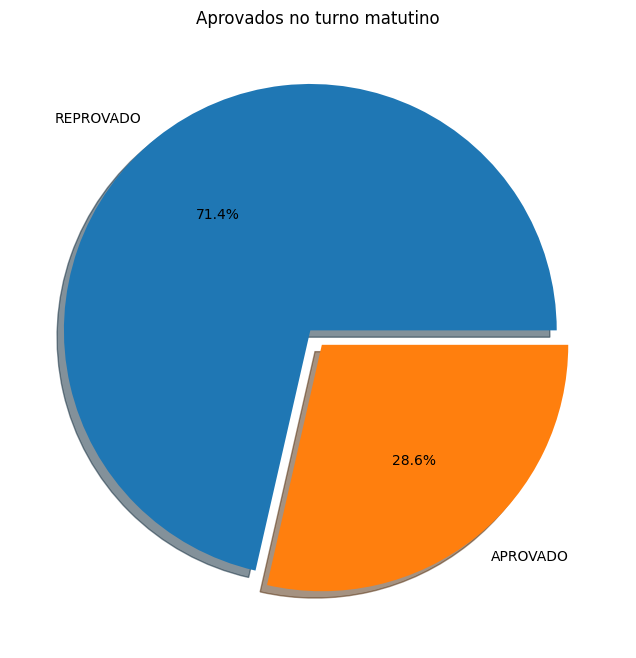

In [98]:
grafico_matutino = analisa(resultado_matutino, 'Resultado', PCT, False)
grafico_matutino.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode=(0.05, 0.025),
    title = (f"Aprovados no turno matutino")
)

In [74]:
resultado_vespertino = pd.read_csv('Notas módulo 2 - Vespertino_Notas.csv')
resultado_vespertino.rename(columns={'name': 'Nome'}, inplace=True)
resultado_vespertino = resultado_vespertino.loc[:, ['Nome', 'Trabalho', 'Resultado']]
resultado_vespertino.Nome = resultado_vespertino.Nome.str.lower()
resultado_vespertino

,Nome,Trabalho,Resultado
0,alexandre paganini marques,"12,3",APROVADO
1,gustavo de souza neves,10,APROVADO
2,alex da rocha silva,0,REPROVADO
3,beatriz barreto buzatto,0,REPROVADO
4,carlos daniel ferreira araujo,0,REPROVADO
5,danyllo duque zanella gonçalves,0,REPROVADO
6,dyego nascimento ferreira,0,REPROVADO
7,enzo klippel,0,REPROVADO
8,fábio da costa luciani,0,REPROVADO
9,flávio vinícius alves da silva,0,REPROVADO


Resultado
REPROVADO    19
APROVADO      2
Name: , dtype: int64


<Axes: title={'center': 'aprovados no turno vespertino'}>

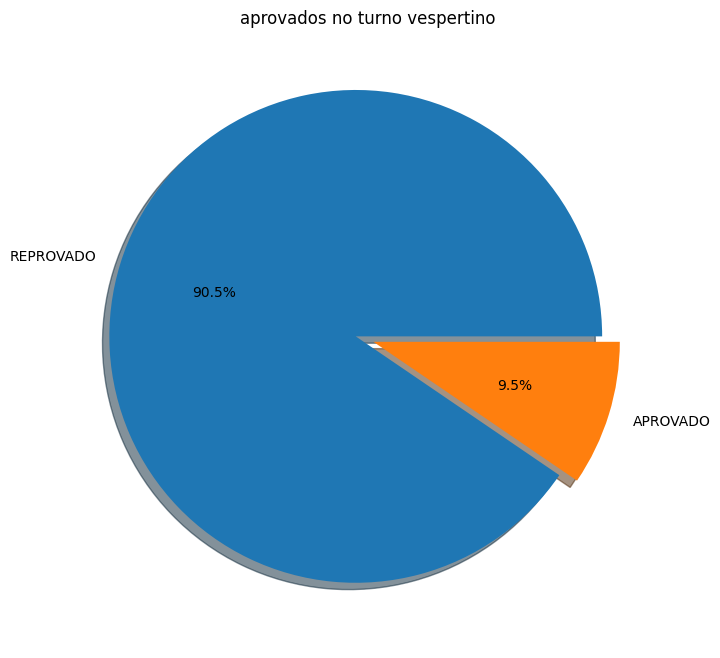

In [97]:
grafico_vespertino = analisa(resultado_vespertino, 'Resultado', PCT, False)
grafico_vespertino.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode=(0.05, 0.025),
    title = (f"aprovados no turno vespertino")
)

In [93]:
matutino_aprovado = resultado_matutino[resultado_matutino['Resultado'] == 'APROVADO']
vespertino_aprovado = resultado_vespertino[resultado_vespertino['Resultado'] == 'APROVADO']

aprovados = pd.concat([matutino_aprovado, vespertino_aprovado])
geral = pd.concat([nome_matutino, nome_vespertino])

dados_aprovados = pd.merge(aprovados, inscritos, on='Nome', how='left')
dados_geral = pd.merge(geral, inscritos, on = 'Nome', how = 'left')


tem computador
True     40
False     7
Name: , dtype: int64


<Axes: title={'center': 'Alunos do modulo 2 tem computador?'}>

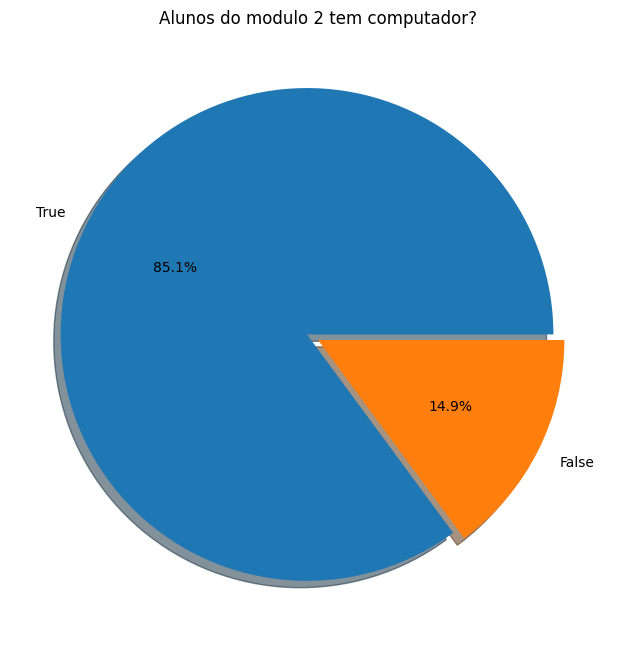

In [95]:
computador_geral = analisa(dados_geral, 'tem computador', PCT, False)
computador_geral.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode = (0.05, 0),
    title = (f"Alunos do modulo 2 tem computador?")
)

tem internet
True     46
False     1
Name: tem internet, dtype: int64


<Axes: title={'center': 'Alunos do modulo 2 tem internet?'}, ylabel='tem internet'>

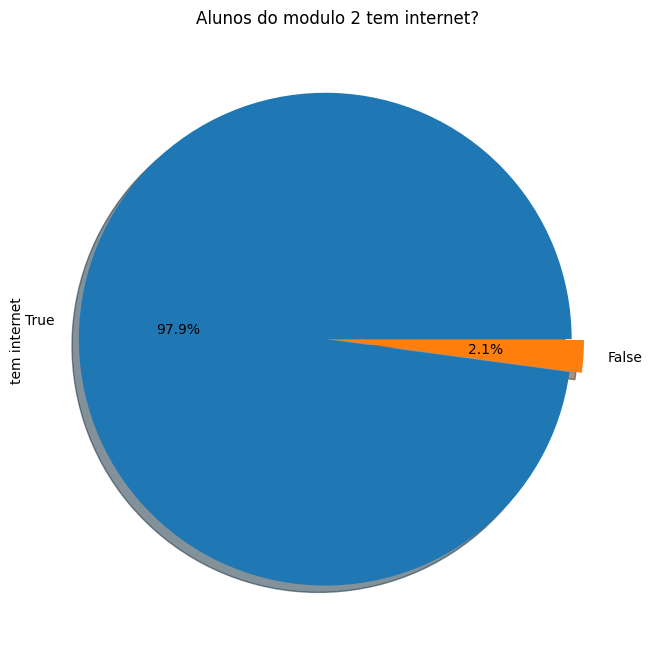

In [96]:
internet_geral = analisa(dados_geral, 'tem internet', False)
internet_geral.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode = (0.05, 0),
    title = (f"Alunos do modulo 2 tem internet?")
)